In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data_git = pd.read_csv(r"E:\data\merge_commit.csv", sep=",", header=None)
data_git.columns = ["id", "commit_hash", "is_conflicting", "p1", "p2", "project_id", "is_done", "author_name", 
                 "author_email", "timestamp"]

In [3]:
refactoring_region = pd.read_csv(r"E:\data\refactoring_region.csv", sep=",", header=None)
refactoring_region.columns = ["id", "start_line", "length", "type", "path", "refactoring_id", "refactoring_commit_id", 
                              "commit_hash", "project_id"]

In [385]:
conflicting_region_history = pd.read_csv(r"E:\data\conflicting_region_history.csv", sep=",", header=None)
conflicting_region_history.columns = ["id", "commit_hash", "merge_parent", "old_start_line", "old_length", "old_path", 
                                      "new_start_line", "new_length", "new_path", "conflicting_region_id", 
                                      "conflicting_java_file_id", "merge_commit_id", "project_id", "author_name", 
                                      "author_email", "timestamp"]

In [347]:
conflicting_region_history.drop(columns = ["old_start_line", "old_length", "old_path", "new_start_line", "new_length", 
                                           "new_path", "author_name", "author_email", "conflicting_region_id", 
                                           "conflicting_java_file_id", "conflicting_region_id"], inplace=True)

In [6]:
evolutionary_commits_with_refactoring = refactoring_region.merge(conflicting_region_history, on="commit_hash", how="inner")

In [166]:
refactoring_ec_git = evolutionary_commits_with_refactoring.drop_duplicates(subset=["refactoring_id"])

In [181]:
intellimerge_data = pd.read_csv(r"E:\data\intellimerge_conflicts.csv")

In [345]:
merges_intellimerge = intellimerge_data.merge(data_git, left_on="merge_id", right_on="id", how = "inner")

In [210]:
merges_intellimerge

,Unnamed: 0,id_x,file,startline_p1,endline_p1,startline_p2,endline_p2,merge_id,project,id_y,commit_hash,is_conflicting,p1,p2,project_id,is_done,author_name,author_email,timestamp
0,0,0,nifty/src/test/java/de/lessvoid/nifty/node/Abs...,133,138,140,140,1729,intelli_niftygui,1729,e768dea4999ad24120c566eef3c5bae0ec3728e8,1,fe877444c1a801a11c3a59e5ceea03e6d50eff44,0ab87916e41c35516fb29d903de4a63f87a34b89,19,1,Martin Karing,nitram@illarion.org,1441472938
1,1,1,nifty/src/test/java/de/lessvoid/nifty/node/Abs...,160,167,169,171,1729,intelli_niftygui,1729,e768dea4999ad24120c566eef3c5bae0ec3728e8,1,fe877444c1a801a11c3a59e5ceea03e6d50eff44,0ab87916e41c35516fb29d903de4a63f87a34b89,19,1,Martin Karing,nitram@illarion.org,1441472938
2,2,2,nifty/src/test/java/de/lessvoid/nifty/node/Abs...,197,204,206,208,1729,intelli_niftygui,1729,e768dea4999ad24120c566eef3c5bae0ec3728e8,1,fe877444c1a801a11c3a59e5ceea03e6d50eff44,0ab87916e41c35516fb29d903de4a63f87a34b89,19,1,Martin Karing,nitram@illarion.org,1441472938
3,3,3,nifty/src/test/java/de/lessvoid/nifty/node/Abs...,224,231,233,235,1729,intelli_niftygui,1729,e768dea4999ad24120c566eef3c5bae0ec3728e8,1,fe877444c1a801a11c3a59e5ceea03e6d50eff44,0ab87916e41c35516fb29d903de4a63f87a34b89,19,1,Martin Karing,nitram@illarion.org,1441472938
4,4,4,nifty/src/main/java/de/lessvoid/nifty/Nifty.java,378,380,382,384,1764,intelli_niftygui,1764,6b27743906f8ab5cf392d27a3ea2414fb7774b1f,1,42cbd163f776045023e7676f14019cf67053ebf6,b7c362ea41caf9c2b6d203ed34a572b35ad3f18b,19,1,Martin Karing,nitram@illarion.org,1440229767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16051,526,526,common/src/main/java/org/cloudfoundry/identity...,64,64,66,66,79120,uaa,79120,266d8668e414b4ec2543f31e89bc3a60006aec15,1,4e964cb56f3b73c047a30736a5b4311c792aab37,17f4c2709e4f3d21d66358763a075eccb9871946,391,1,Vidya Valmikinathan,vidya@rbcon.com,1348525385
16052,527,527,common/src/main/java/org/cloudfoundry/identity...,232,240,242,248,79120,uaa,79120,266d8668e414b4ec2543f31e89bc3a60006aec15,1,4e964cb56f3b73c047a30736a5b4311c792aab37,17f4c2709e4f3d21d66358763a075eccb9871946,391,1,Vidya Valmikinathan,vidya@rbcon.com,1348525385
16053,528,528,common/src/main/java/org/cloudfoundry/identity...,250,257,259,264,79135,uaa,79135,cc19ca33c62a807b9b288e8d871ec119902b8c1a,1,79320108684bb455d71c405de668c87f07e87880,70b3267fcb0d3d856a08c72f535c9ccecc3fc1ca,391,1,Dave Syer,dsyer@vmware.com,1346324658
16054,529,529,common/src/main/java/org/cloudfoundry/identity...,65,69,71,71,79161,uaa,79161,547411becb35e1c4ced335b83e739fa8d7a80792,1,9bd986edb1fe11ffa473ca0a6fda33e8b1382641,bb43295c801a07c8753a73122bd3a5f3df9c8a86,391,1,Dave Syer,dsyer@vmware.com,1341831787


In [29]:
qtd_evolutionary_git = conflicting_region_history[["project_id", "merge_commit_id", "commit_hash"]]
evolutionary_git = qtd_evolutionary_git.groupby("project_id").agg({"merge_commit_id": np.size}).reset_index()
evolutionary_git.rename(columns={"merge_commit_id":"evolutionary_commits"}, inplace=True)

In [169]:
refactoring_in_evolutionary_git = refactoring_ec_git.groupby("project_id_x").agg({"refactoring_id": np.size}).reset_index()

In [172]:
refactoring_in_evolutionary_git.rename(columns={"project_id_x":"project_id", "refactoring_id":"refactoring_ec_git"}, inplace=True)

In [201]:
java_git_scenarios = pd.read_csv(r"E:\data\conflicting_java_file.csv", sep=",")
java_git_scenarios.columns = ["id", "file", "type", "merge_id", "project_id"]

In [348]:
evolutionary_commits_intellimerge = merges_intellimerge.merge(conflicting_region_history, left_on="merge_id", right_on="merge_commit_id", how="inner")

In [353]:
evolutionary_commits_intellimerge.drop_duplicates(subset=["id"], inplace=True)

In [366]:
authors_intellimerge = evolutionary_commits_intellimerge.groupby("project_id_y").agg({"author_name": pd.Series.nunique}).reset_index()
authors_intellimerge.rename(columns={"author_name":"authors_intellimerge"}, inplace=True)

In [374]:
authors_intellimerge.rename(columns={"project_id_y":"project_id"}, inplace = True)

In [350]:
evolutionary_commits_intellimerge.drop(columns=["file", "startline_p1", "endline_p1", "startline_p2", 
                                                "endline_p2", "project", "p1", "p2", "project_id_x",
                                                "timestamp_x", "timestamp_y", "Unnamed: 0"], inplace=True)

In [331]:
evolutionary_commits_intellimerge.rename(columns={"id_x":"id_intellimerge", "id_y":"id_git"}, inplace=True)

In [332]:
refactoring_regions_intellimerge = evolutionary_commits_intellimerge.merge(refactoring_region, right_on="commit_hash", left_on="commit_hash_y", how="inner")


In [333]:
refactoring_regions_intellimerge.nunique()

id_intellimerge           7821
merge_id                  1722
id_git                    1722
commit_hash_x             1722
is_conflicting               1
is_done                      1
author_name                545
author_email               541
id_x                     33794
commit_hash_y             4875
merge_parent                 2
merge_commit_id           1722
project_id_y               191
id_y                     87884
start_line                2119
length                     762
type                         2
path                     16550
refactoring_id           40867
refactoring_commit_id     4875
commit_hash               4875
project_id                 191
dtype: int64

In [334]:
refactoring_regions_intellimerge.drop_duplicates(subset=["id_y"], inplace=True)

In [335]:
rr_intellimerge = refactoring_regions_intellimerge.groupby("project_id").agg({"id_y": np.size}).reset_index()
rr_intellimerge.rename(columns={"id_y":"rr_intellimerge"}, inplace=True)

In [216]:
#evolutionary_commits_intellimerge.nunique()

evolutionary_intellimerge = evolutionary_commits_intellimerge.groupby("project_id_x").agg({"merge_id": np.size}).reset_index()
evolutionary_intellimerge.rename(columns={"project_id_x": "project_id", "merge_id":"evolutionary_commits"}, inplace=True)

In [215]:
evolutionary_commits_intellimerge.drop_duplicates(subset=["id"], inplace=True)

In [42]:
jfst_scenarios = pd.read_csv(r"e:\data\jfstmerge_conflicts.csv", sep=";")

In [43]:
merges_jfst = jfst_scenarios.merge(data_git, left_on="merge_id", right_on="id", how = "inner")

In [ ]:
merges_jfst["merge_id"].nunique()

In [44]:
merges_jfst.drop(columns=["project_name", "id_y"], inplace=True)

In [117]:
evolutionary_commits_jfst_merge = merges_jfst.merge(conflicting_region_history, left_on="merge_id", right_on="merge_commit_id", how="inner")

In [118]:
evolutionary_commits_jfst_merge.drop_duplicates(subset=["id"], inplace=True)

In [121]:
evolutionary_commits_jfst_merge.rename(columns={"id_x": "id_git"}, inplace=True)

In [122]:
refactoring_regions_jfst = evolutionary_commits_jfst_merge.merge(refactoring_region, right_on="commit_hash", left_on="commit_hash_y", how="inner")

In [123]:
refactoring_regions_jfst.drop_duplicates(subset=["id_y"], inplace=True)

In [124]:
evolutionary_jfst = evolutionary_commits_jfst_merge.groupby("project_id_x").agg({"merge_id": np.size}).reset_index()
evolutionary_jfst.rename(columns={"project_id_x": "project_id", "merge_id":"evolutionary_commits"}, inplace=True)

In [125]:
rr_jfst = refactoring_regions_jfst.groupby("project_id").agg({"id_y": np.size}).reset_index()
rr_jfst.rename(columns={"id_y":"rr_jfst"}, inplace=True)

In [392]:
evolutionary_commits_jfst_merge["author_name"].nunique()

1054

In [140]:
refactoring_ec_jfst = evolutionary_commits_jfst_merge.merge(refactoring_region, right_on="commit_hash", left_on="commit_hash_y", how="inner")

In [142]:
refactoring_ec_jfst.drop_duplicates(subset=["refactoring_id"], inplace=True)

In [150]:
rr_evolutionary_jfst = refactoring_ec_jfst.groupby("project_id").agg({"refactoring_id": np.size}).reset_index()
rr_evolutionary_jfst.rename(columns={"refactoring_id":"rr_evolutionary_jfst"}, inplace=True)

In [7]:
git_table = pd.read_csv(r"E:\data\git_data_modeling.csv", sep=",") ### git_table

In [77]:
jfstmerge_table = pd.read_csv(r"E:\data\jfstmerge_table.csv", sep=",")

In [221]:
intellimerge_table = pd.read_csv(r"E:\data\intellimerge_table.csv", sep=",") ### git_table

In [231]:
projects = pd.read_csv(r"E:\data\project.csv", sep=",", header=None)
projects.columns = ["id", "url", "name", "is_done"]

In [235]:
intellimerge_table = intellimerge_table.merge(projects, left_on="project", right_on="name", how ="inner")

In [238]:
intellimerge_table.drop(columns = ["url", "name", "is_done", "Unnamed: 0", "project"], inplace=True)

In [240]:
intellimerge_table.rename(columns={"id":"project_id"}, inplace=True)

In [241]:
intellimerge_table = evolutionary_intellimerge.merge(intellimerge_table, how="inner", on="project_id")

In [337]:
intellimerge_table = rr_intellimerge.merge(intellimerge_table, how="inner", on="project_id")

In [376]:
intellimerge_table = authors_intellimerge.merge(intellimerge_table, how="inner", on="project_id")

In [79]:
jfstmerge_table = evolutionary_jfst.merge(jfstmerge_table, how="inner", on="project_id")

In [154]:
jfstmerge_table = rr_jfst.merge(jfstmerge_table, how="inner", on="project_id")

In [155]:
jfstmerge_table = rr_evolutionary_jfst.merge(jfstmerge_table, how="inner", on="project_id")

In [36]:
git_table = evolutionary_git.merge(git_table, how="inner", on="project_id")

In [176]:
git_table = refactoring_in_evolutionary_git.merge(git_table, how="inner", on="project_id")

In [177]:
git_table

,project_id,refactoring_ec_git,evolutionary_commits,refactoring_scenario_amount,cr_amount,authors_amount,conflicting_files,scenarios,rr_amount,conflicts_with_ref_per_scenario,conflicting_scenarios
0,1,281,168,45,88,6,48,133,684,15,21
1,7,206,210,74,100,5,49,504,444,10,26
2,9,332,562,159,256,10,128,353,715,5,50
3,11,308,273,118,131,16,122,5044,615,22,77
4,14,147,109,26,64,5,44,122,310,1,12
...,...,...,...,...,...,...,...,...,...,...,...
150,562,7,21,12,15,4,10,219,15,1,8
151,563,1356,1113,172,411,3,288,235,2908,46,43
152,564,52,48,29,21,6,14,271,116,4,9
153,565,446,225,78,92,15,54,759,952,4,30


In [10]:
def regression_plot(table, iv, dv, title, labelx, labely):

    df = table[[iv, dv]]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=iv, y=dv, s=100, color='blue', label='Observed Data')

    linear_model = LinearRegression()
    X = df[iv].values.reshape(-1, 1)
    y = df[dv].values
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)

    plt.plot(df[iv], y_pred_linear, color='red', label='Linear Trend')

    X_continuous = np.linspace(df[iv].min(), df[iv].max(), 500).reshape(-1, 1)

    plt.title(title, fontsize=16)
    plt.xlabel(labelx, fontsize=14)
    plt.ylabel(labely, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    r2_linear = linear_model.score(X, y)
    print(f"R² for linear trend: {r2_linear:.2f}")

In [178]:
### Git Table
table = git_table

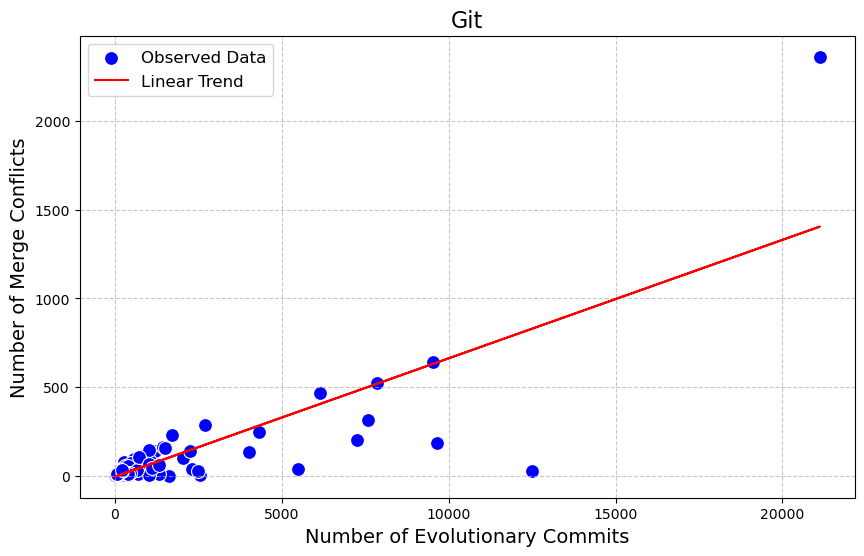

R² for linear trend: 0.67


In [39]:
### Git
###  Evolutionary Commits

iv = 'evolutionary_commits'
dv = 'conflicting_scenarios'
title = 'Git'
labelx = 'Number of Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

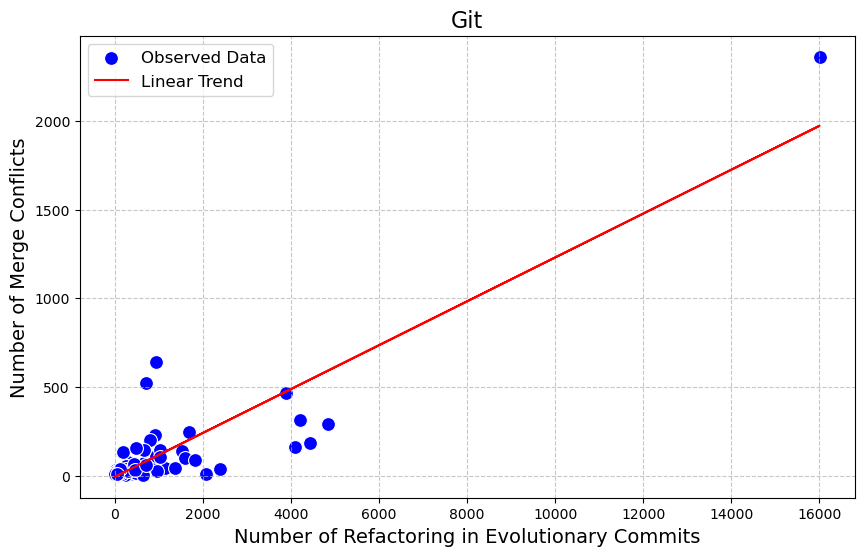

R² for linear trend: 0.80


In [180]:
###  Git
###  Refactoring in Evolutionary Commits

iv = 'refactoring_ec_git'
dv = 'conflicting_scenarios'
title = 'Git'
labelx = 'Number of Refactoring in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

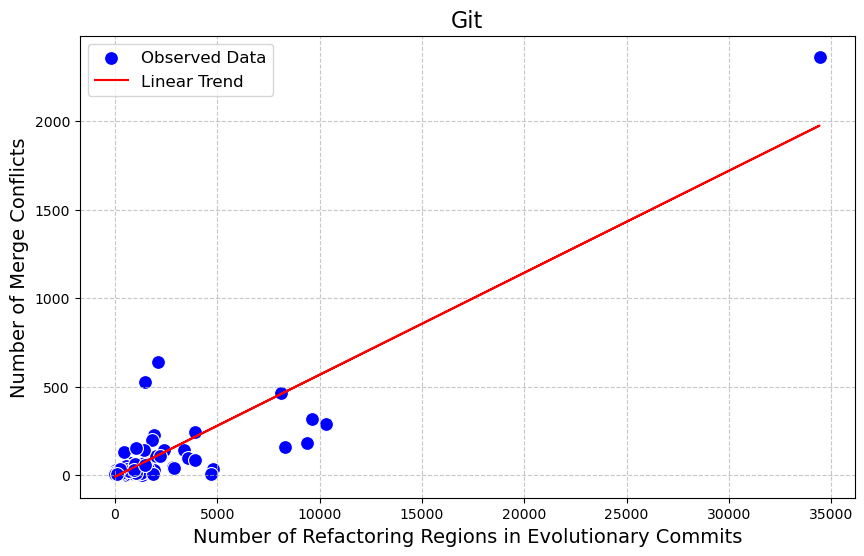

R² for linear trend: 0.81


In [12]:
### Git
###  Refactoring Regions in Evolutionary Commits

iv = 'rr_amount'
dv = 'conflicting_scenarios'
title = 'Git'
labelx = 'Number of Refactoring Regions in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

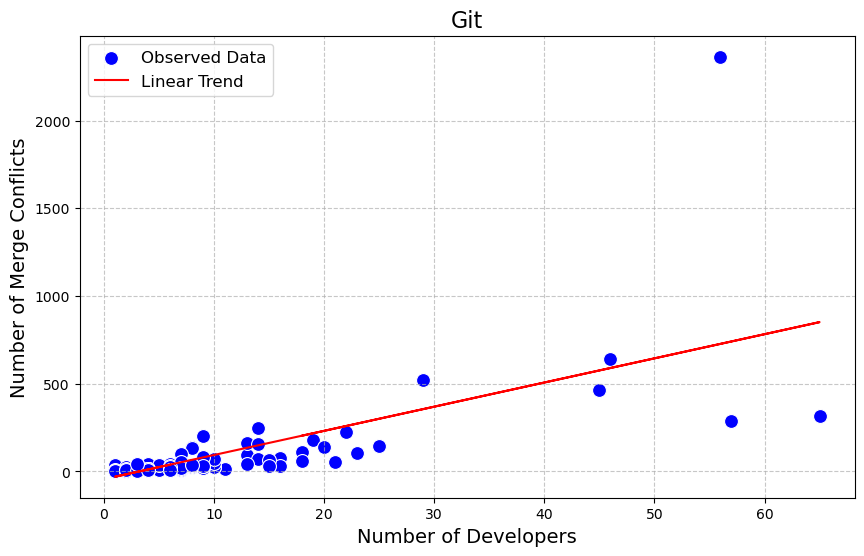

R² for linear trend: 0.46


In [13]:
###  Git
###  Developers

iv = 'authors_amount'
dv = 'conflicting_scenarios'
title = 'Git'
labelx = 'Number of Developers'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

In [156]:
### jFSTMerge Table
table = jfstmerge_table

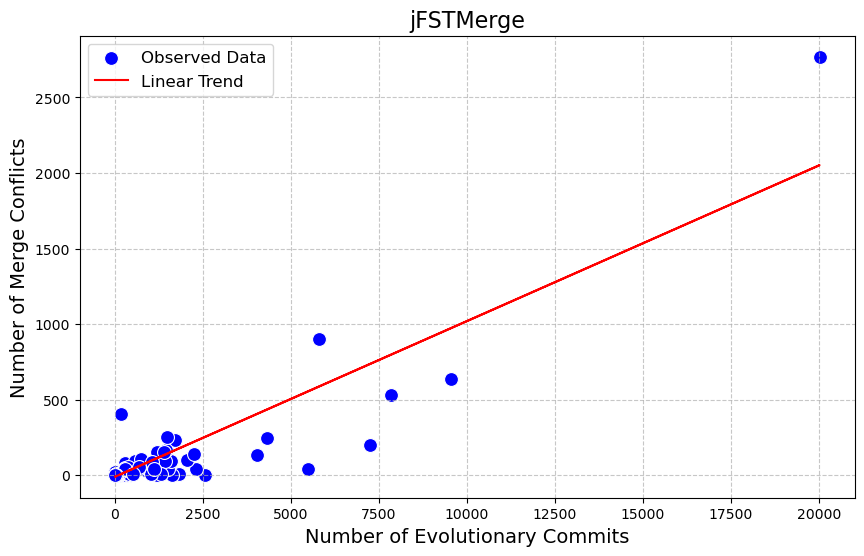

R² for linear trend: 0.80


In [85]:
###  jFSTMerge
###  Evolutionary Commits

iv = 'evolutionary_commits'
dv = 'conflicting_scenarios'
title = 'jFSTMerge'
labelx = 'Number of Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

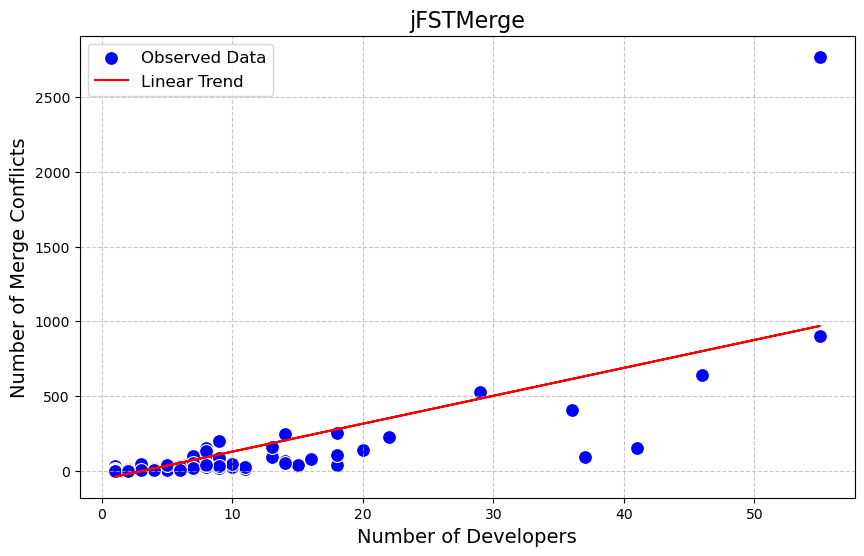

R² for linear trend: 0.52


In [15]:
###  jFSTMerge
###  Developers

iv = 'author_number'
dv = 'conflicting_scenarios'
title = 'jFSTMerge'
labelx = 'Number of Developers'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

In [16]:
table

,Unnamed: 0,project_id,conflicting_scenarios,author_number,refactoring_number,conflicts_with_refactoring,refactoring_scenarios,cr_number
0,0,1,22,6,17,15,19,88
1,1,7,26,5,18,23,32,100
2,2,8,2,2,2,7,10,20
3,3,9,50,10,34,49,62,256
4,4,11,77,16,37,30,43,131
...,...,...,...,...,...,...,...,...
197,197,575,2,1,1,1,1,3
198,198,577,8,3,4,7,11,179
199,199,578,1,1,1,1,1,1
200,200,589,3,2,2,4,5,17


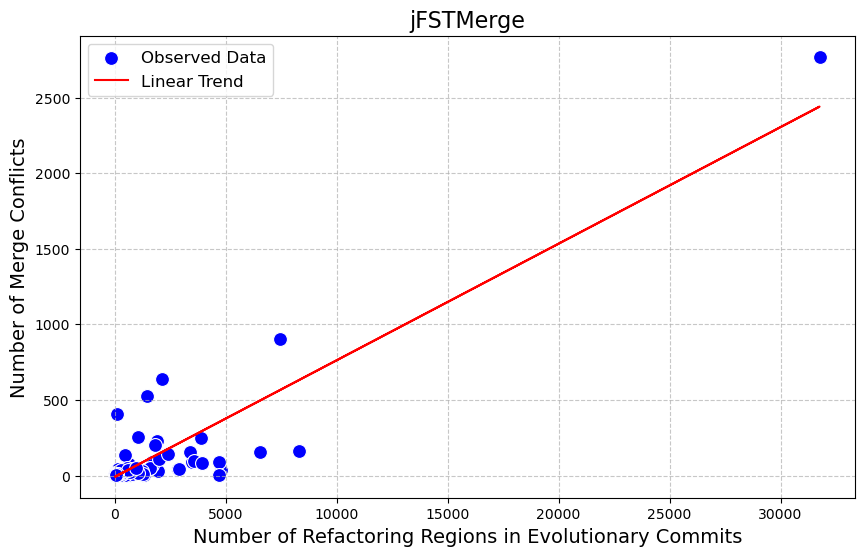

R² for linear trend: 0.81


In [130]:
###  jFSTMerge
###  Refactoring Regions in Evolutionary Commits

iv = 'rr_jfst'
dv = 'conflicting_scenarios' 
title = 'jFSTMerge'
labelx = 'Number of Refactoring Regions in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

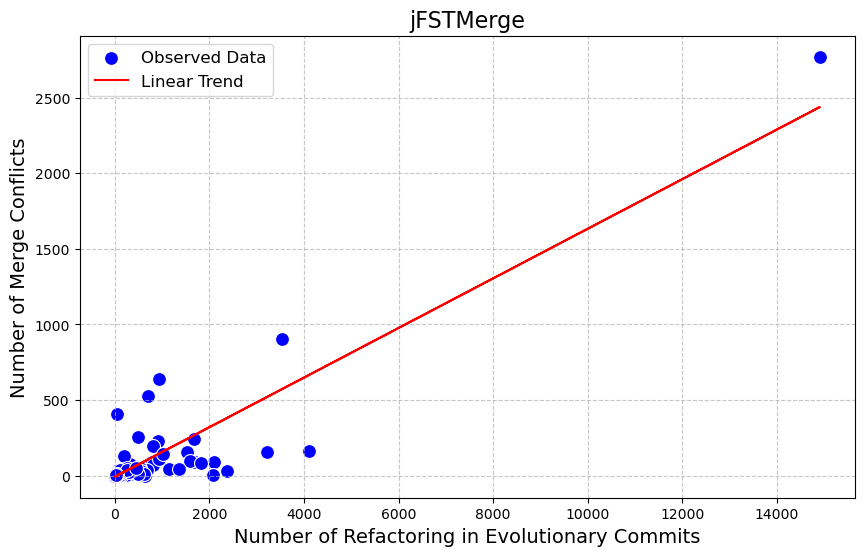

R² for linear trend: 0.81


In [158]:
###  jFSTMerge
###  Refactoring in Evolutionary Commits

iv = 'rr_evolutionary_jfst'
dv = 'conflicting_scenarios'
title = 'jFSTMerge'
labelx = 'Number of Refactoring in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

In [245]:
table

,project_id,evolutionary_commits,cr_number,authors_number,refactoring_number,refactoring_scenarios,conflicting_scenarios,conflicts_with_refactoring
0,107,10,4,1,4,3,2,3
1,109,167,47,5,42,12,10,12
2,110,26,8,1,2,2,2,2
3,111,1047,217,13,192,131,53,97
4,114,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
149,574,12,4,1,4,1,1,1
150,575,7,3,1,2,1,2,1
151,577,201,25,3,21,5,6,3
152,589,18,7,2,2,1,2,1


In [379]:
### IntelliMerge Table
table = intellimerge_table

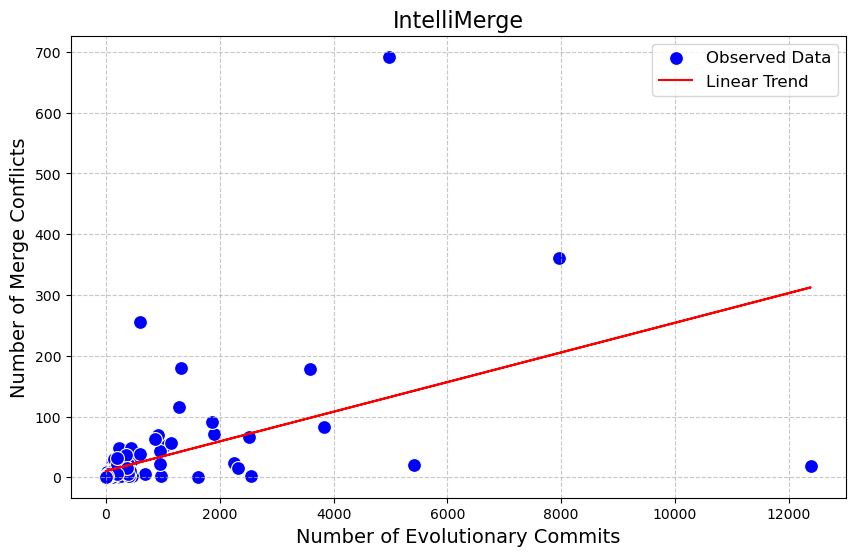

R² for linear trend: 0.25


In [339]:
###  IntelliMerge
###  Evolutionary Commits

iv = 'evolutionary_commits'
dv = 'conflicting_scenarios'
title = 'IntelliMerge'
labelx = 'Number of Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

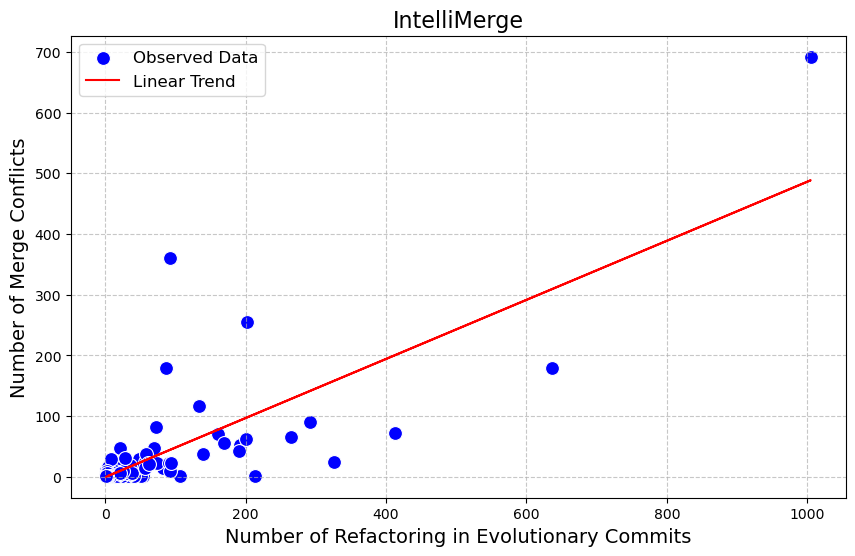

R² for linear trend: 0.62


In [340]:
###  InelliMerge
###  Refactoring in Evolutionary Commits

iv = 'refactoring_number'
dv = 'conflicting_scenarios'
title = 'IntelliMerge'
labelx = 'Number of Refactoring in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

In [249]:
table

,project_id,evolutionary_commits,cr_number,authors_number,refactoring_number,refactoring_scenarios,conflicting_scenarios,conflicts_with_refactoring
0,107,10,4,1,4,3,2,3
1,109,167,47,5,42,12,10,12
2,110,26,8,1,2,2,2,2
3,111,1047,217,13,192,131,53,97
4,114,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
149,574,12,4,1,4,1,1,1
150,575,7,3,1,2,1,2,1
151,577,201,25,3,21,5,6,3
152,589,18,7,2,2,1,2,1


In [ ]:
authors_intellimerge

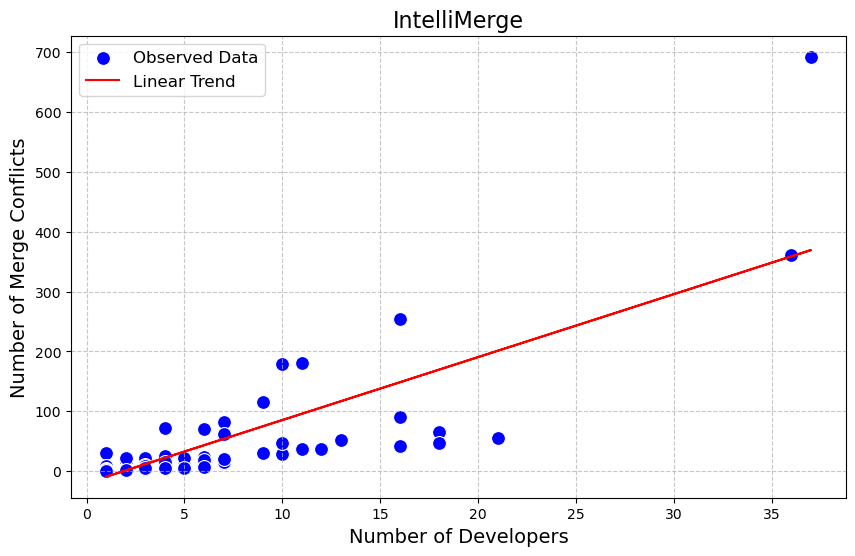

R² for linear trend: 0.66


In [380]:
###  InelliMerge
###  Developers

iv = 'authors_intellimerge'
dv = 'conflicting_scenarios'
title = 'IntelliMerge'
labelx = 'Number of Developers'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)

In [317]:
intellimerge_table

,project_id,rr_intellimerge,evolutionary_commits,cr_number,authors_number,refactoring_number,refactoring_scenarios,conflicting_scenarios,conflicts_with_refactoring
0,107,283,10,4,1,4,3,2,3
1,109,158,167,47,5,42,12,10,12
2,110,37,26,8,1,2,2,2,2
3,111,1559,1047,217,13,192,131,53,97
4,114,13,3,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
149,574,4,12,4,1,4,1,1,1
150,575,1,7,3,1,2,1,2,1
151,577,66,201,25,3,21,5,6,3
152,589,3,18,7,2,2,1,2,1


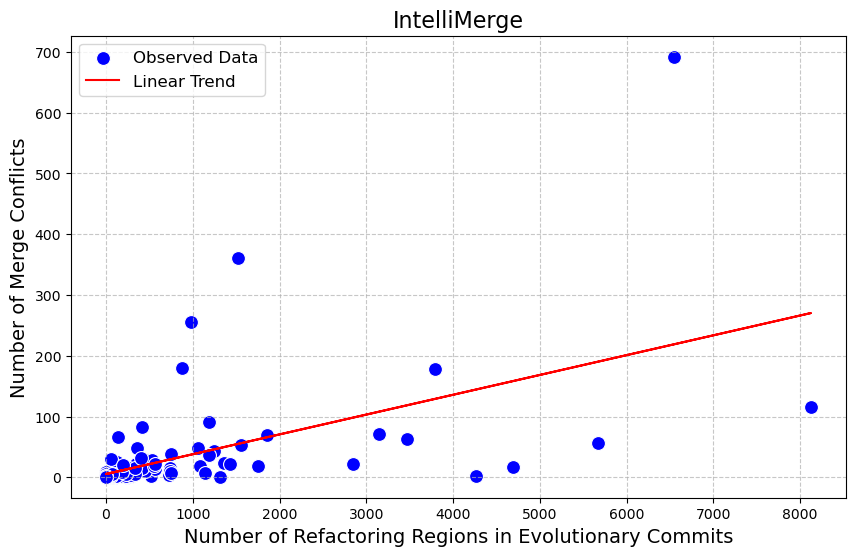

R² for linear trend: 0.31


In [344]:
###  IntelliMerge
###  Developers

iv = 'rr_intellimerge_x'
dv = 'conflicting_scenarios'
title = 'IntelliMerge'
labelx = 'Number of Refactoring Regions in Evolutionary Commits'
labely = 'Number of Merge Conflicts'
regression_plot(table, iv, dv, title, labelx, labely)